In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
#import data and define test and train datasets
test = pd.read_pickle('test.pkl')
train = pd.read_pickle('train.pkl')

selected_features1 = train.loc[:,"exchange_NASDAQ":"location_Wisconsin; U.S.A"]
selected_features2 = train.loc[:, "ncfbus_abs":"ncfo_io"]
selected_features3 = train.loc[:, ["assets", "capex", "liabilities", "debtusd", "ebitdausd", "netinccmnusd", 
                                  "equityusd", "revenueusd", "cashnequsd", "marketcap", "ev"]]
selected_features_j = selected_features1.join(selected_features2)
selected_features = selected_features_j.join(selected_features3)

X_train = selected_features
y_train = train["firm"]

selected_features1 = test.loc[:,"exchange_NASDAQ":"location_Wisconsin; U.S.A"]
selected_features2 = test.loc[:, "ncfbus_abs":"ncfo_io"]
selected_features3 = test.loc[:, ["assets", "capex", "liabilities", "debtusd", "ebitdausd", "netinccmnusd", 
                                  "equityusd", "revenueusd", "cashnequsd", "marketcap", "ev"]]
selected_features_j = selected_features1.join(selected_features2)
selected_features = selected_features_j.join(selected_features3)

X_test = selected_features
y_test = test["firm"]

In [3]:
#scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
#fit, cross validate model, print accuracy scores
lm = LogisticRegression(solver='newton-cg')
lm.fit(X_train, y_train)
print(np.average(cross_val_score(lm, X_train, y_train, cv=5)))
print(lm.score(X_test, y_test))

0.8055555555555556
0.7963446475195822


In [5]:
#view classification report
y_pred_test = lm.predict(X_test)
result1 = classification_report(y_test, y_pred_test)
print("Classification Report:",)
print(result1)

Classification Report:
              precision    recall  f1-score   support

       Big 4       0.81      0.87      0.84       463
       Other       0.77      0.69      0.73       303

    accuracy                           0.80       766
   macro avg       0.79      0.78      0.78       766
weighted avg       0.79      0.80      0.79       766



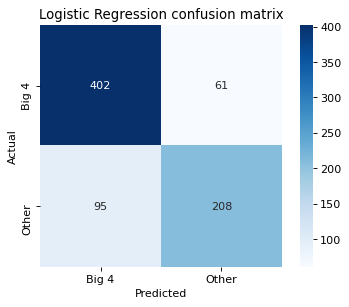

In [6]:
# Print confusion matrix 
lm_confusion = confusion_matrix(y_test, y_pred_test)
plt.figure(dpi=80)
sns.heatmap(lm_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g',
           xticklabels=['Big 4', 'Other'],
           yticklabels=['Big 4', 'Other'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression confusion matrix');

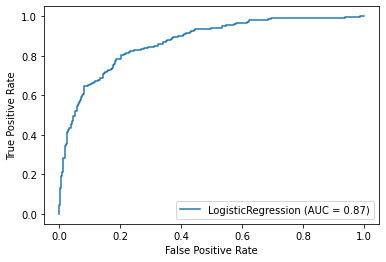

In [7]:
#view ROC curve
metrics.plot_roc_curve(lm, X_test, y_test)
plt.show()

In [8]:
filename = 'logistic.pkl'
pickle.dump(lm, open(filename, 'wb'))